## Analysing Dairy Industry: Trends, Types and Consumption Patterns in Ontario.

### 1.Data preprocessing and cleaning:

#### 1.1. Import necessary libraries and load the datasets:

In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #(# Importing FuncFormatter to format the x and y-axis ticks, wherever applicable)

In [2]:
# Load the datasets conatining multiple sheets from the Excel file
file_path = 'DAB-303_Final dataset combined.xlsx'
sheets = ['Milk sold of farms_KiloLtr', 'Comm. Sales in KiloLtr', 'PerPerson_PerYear_inLtr', 'Cash receipt_in Thousands']

df = {}
for sheet_name in sheets:
    df[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
# The dataset overview after data load.
df

{'Milk sold of farms_KiloLtr':      Location       Date            Sell Type  Volume in KL
 0      Canada 2006-01-01           Total sold        652032
 1      Canada 2006-01-01       Fluid purposes        249346
 2      Canada 2006-01-01  Industrial purposes        402666
 3      Canada 2006-02-01           Total sold        589938
 4      Canada 2006-02-01       Fluid purposes        229778
 ...       ...        ...                  ...           ...
 1267  Ontario 2023-07-01       Fluid purposes         75242
 1268  Ontario 2023-07-01  Industrial purposes        200582
 1269  Ontario 2023-08-01           Total sold        270798
 1270  Ontario 2023-08-01       Fluid purposes         77151
 1271  Ontario 2023-08-01  Industrial purposes        193647
 
 [1272 rows x 4 columns],
 'Comm. Sales in KiloLtr':      Location       Date            Type  Volume in KL
 0      Canada 2006-01-01   Standard milk       34802.0
 1      Canada 2006-01-01         Milk 2%      109562.0
 2      Canada 2

#### 1.2. Display top 5 rows of all the datasets consisting data for both Canada and Ontario:

Dataset related to Milk production and utilization (value in KiloLitres):

In [4]:
# Top rows from 'Milk sold of farms_KiloLtr'
df_sales = df['Milk sold of farms_KiloLtr']
df_sales.head()

,Location,Date,Sell Type,Volume in KL
0,Canada,2006-01-01,Total sold,652032
1,Canada,2006-01-01,Fluid purposes,249346
2,Canada,2006-01-01,Industrial purposes,402666
3,Canada,2006-02-01,Total sold,589938
4,Canada,2006-02-01,Fluid purposes,229778


Dataset related to Commercial Sales of different types of Milk and Cream (values in KiloLitres)

In [5]:
# Top rows from 'Comm. Sales in KiloLtr'
df['Comm. Sales in KiloLtr']
df_comm = df['Comm. Sales in KiloLtr']
df_comm.head()

,Location,Date,Type,Volume in KL
0,Canada,2006-01-01,Standard milk,34802.0
1,Canada,2006-01-01,Milk 2%,109562.0
2,Canada,2006-01-01,Skim milk,24158.0
3,Canada,2006-01-01,Buttermilk,1057.0
4,Canada,2006-01-01,Flavoured milk,16862.0


Dataset related to Per person consumption over the years (in Litres)

In [6]:
# Top rows from 'PerPerson_PerYear_inLtr'
df_person = df['PerPerson_PerYear_inLtr']
df_person.head()

,Year,Type,Food available,Adjusted for losses
0,2006,Cereal cream,3.05,2.36
1,2007,Cereal cream,3.03,2.34
2,2008,Cereal cream,2.97,2.30
3,2009,Cereal cream,3.06,2.37
4,2010,Cereal cream,2.94,2.28


Dataset related to Cash receipts from milk and cream sold off farms (value in Thousands).

In [7]:
# Top rows from 'Cash receipt_in Thousands'
df_cash = df['Cash receipt_in Thousands']
df_cash.head()


,Location,Date,Transactions type,Amount in K
0,Canada,2006-01-01,Total cash receipts,419008
1,Canada,2006-01-01,Total deductions,28844
2,Canada,2006-01-01,Transport handling fees,15810
3,Canada,2006-01-01,Administration fees,2608
4,Canada,2006-01-01,Promotion and advertising,7508


#### 1.3. Check the detail of data types in the datasets:

Information of the data type in the dataset related to Milk production and utilization:

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      1272 non-null   object        
 1   Date          1272 non-null   datetime64[ns]
 2   Sell Type     1272 non-null   object        
 3   Volume in KL  1272 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ KB


Information of the data type in the dataset related to Commercial sales of milk and cream:

In [9]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      4240 non-null   object        
 1   Date          4240 non-null   datetime64[ns]
 2   Type          4240 non-null   object        
 3   Volume in KL  4178 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 132.6+ KB


Information of the data type in the dataset related to Per person consumption over the years:

In [10]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 136 non-null    int64  
 1   Type                 136 non-null    object 
 2   Food available       136 non-null    float64
 3   Adjusted for losses  136 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.4+ KB


Information of the data type in the dataset related to Cash receipts from milk and cream sold off farms:

In [11]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Location           2968 non-null   object        
 1   Date               2968 non-null   datetime64[ns]
 2   Transactions type  2968 non-null   object        
 3   Amount in K        2968 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 92.9+ KB


#### 1.4. Check for missing values in the dataset:

In [12]:
print (f'Milk production and utilization: \n{df_sales.isnull().sum()}\n')
print (f'Commercial sales of milk and cream: \n{df_comm.isnull().sum()}\n')
print (f'Per person consumption over the years: \n{df_person.isnull().sum()}\n')
print (f'Cash receipts from milk and cream sold off farms: \n{df_cash.isnull().sum()}\n')

Milk production and utilization: 
Location        0
Date            0
Sell Type       0
Volume in KL    0
dtype: int64

Commercial sales of milk and cream: 
Location         0
Date             0
Type             0
Volume in KL    62
dtype: int64

Per person consumption over the years: 
Year                   0
Type                   0
Food available         0
Adjusted for losses    0
dtype: int64

Cash receipts from milk and cream sold off farms: 
Location             0
Date                 0
Transactions type    0
Amount in K          0
dtype: int64



`From above analysis, we can understand that there is missing values only in the "Commercial sales of milk and cream dataset" (df_comm), rest of the other dataset don't have any missing values.`

Analyzing the missing values in `df_comm` dataset:

In [13]:
df_missing = df_comm[df_comm.isna().any(axis=1)]
df_missing

,Location,Date,Type,Volume in KL
3569,Ontario,2018-01-01,Sour cream,NaN
3589,Ontario,2018-03-01,Sour cream,NaN
3599,Ontario,2018-04-01,Sour cream,NaN
3609,Ontario,2018-05-01,Sour cream,NaN
3619,Ontario,2018-06-01,Sour cream,NaN
...,...,...,...,...
4179,Ontario,2023-02-01,Sour cream,NaN
4189,Ontario,2023-03-01,Sour cream,NaN
4209,Ontario,2023-05-01,Sour cream,NaN
4229,Ontario,2023-07-01,Sour cream,NaN


In [14]:
df_missing['Type'].unique()

array(['Sour cream'], dtype=object)

`From further analysis, we could see that the missing values are related to Sour cream data, since it is numerical data, we will replace the missing values by the mean value, as both Mean and Median values are almost similar for this dataset.`

In [15]:
# replacing the missing values with their mean.
                                
df_comm.loc[(df_comm['Location'] == 'Ontario') & (df_comm['Type'] == 'Sour cream'), 'Volume in KL'] = \
    df_comm.loc[(df_comm['Location'] == 'Ontario') & (df_comm['Type'] == 'Sour cream'), 'Volume in KL'].fillna(
        df_comm.loc[(df_comm['Location'] == 'Ontario') & (df_comm['Type'] == 'Sour cream'), 'Volume in KL'].mean()
    )

Check the `df_comm` dataset again after updating the missing values:

In [16]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      4240 non-null   object        
 1   Date          4240 non-null   datetime64[ns]
 2   Type          4240 non-null   object        
 3   Volume in KL  4240 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 132.6+ KB


`All the missing values updated successfully in the df_comm dataframe by the mean value.`

#### 1.5. Check for Duplicate values in the dataset:

In [17]:
print('Check for duplicate values in all the dataset: \n')
print (f'Milk production and utilization : {df_sales.duplicated().any()}\n')
print (f'Commercial sales of milk and cream : {df_comm.duplicated().any()}\n')
print (f'Per person consumption over the years : {df_person.duplicated().any()}\n')
print (f'Cash receipts from milk and cream sold off farms : {df_cash.duplicated().any()}\n')

Check for duplicate values in all the dataset: 

Milk production and utilization : False

Commercial sales of milk and cream : False

Per person consumption over the years : False

Cash receipts from milk and cream sold off farms : False



`From above analysis we could observe that there is no duplicate values in the overall datasets.`

### 2. Perform Data Visualization to better understand the trends/relations within each dataset:

#### 2.1 Visualization to check the trend of Total milk sales off farm over the years for Ontario:

In [18]:
# First we will create a new column that will display the year for each row of data from the Date column
df_sales['Year'] = df_sales['Date'].dt.year.astype('int')
df_sales.head()

,Location,Date,Sell Type,Volume in KL,Year
0,Canada,2006-01-01,Total sold,652032,2006
1,Canada,2006-01-01,Fluid purposes,249346,2006
2,Canada,2006-01-01,Industrial purposes,402666,2006
3,Canada,2006-02-01,Total sold,589938,2006
4,Canada,2006-02-01,Fluid purposes,229778,2006


In [19]:
# Now we will calculate the Avergae volume of sales of milk for each year.
yearly_sales = df_sales[(df_sales['Sell Type']=='Total sold')].groupby(['Location','Year'])['Volume in KL'].mean().reset_index()
yearly_sales.head()

,Location,Year,Volume in KL
0,Canada,2006,619595.750000
1,Canada,2007,632246.833333
2,Canada,2008,632080.166667
3,Canada,2009,637768.500000
4,Canada,2010,638834.833333


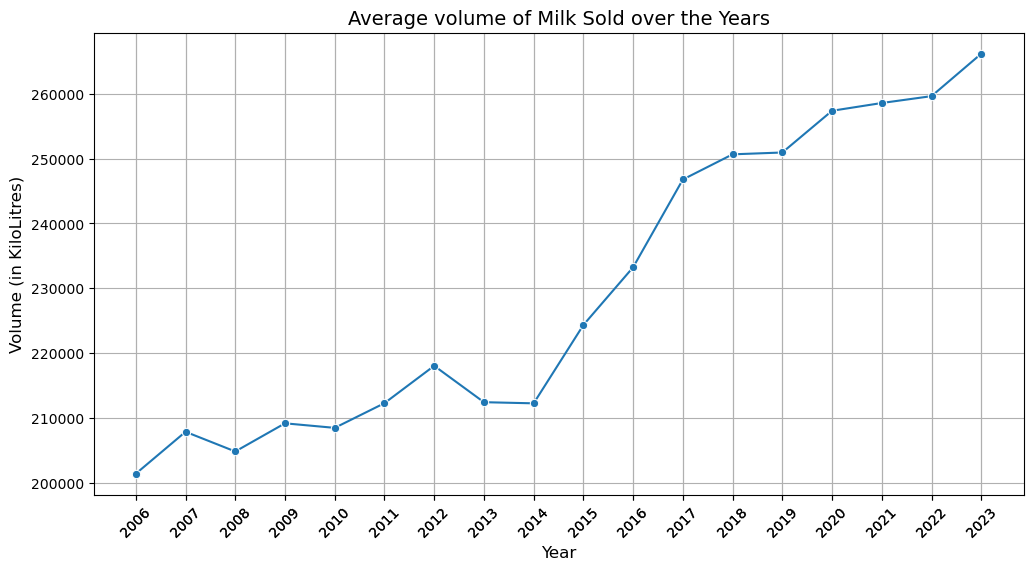

In [41]:
# Plot a line chart displaying yearly sales trend of milk of farm for Ontario.

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales[yearly_sales['Location']=='Ontario'], x="Year", y="Volume in KL", marker='o')

# Adding title and labels
plt.title('Average volume of Milk Sold over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in KiloLitres)', fontsize=12)
plt.xticks(yearly_sales['Year'], rotation=45)

plt.grid(True)

# Below code to display the milk sold volume in numbers instead of exponential form
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()


`From above chart we could observe that:`

- There is a substantial increase in milk sales from 2014 to 2018. 
- Post-2018, the growth in sales volume appears to have slowed compared to the preceding four-year period.

#### 2.2. Visualization to check the distribution of milk sold for Fluid and Industrial purpose over the years

In [21]:

yearly_sales_type = df_sales[(df_sales['Sell Type']!='Total sold')].groupby(['Location','Sell Type','Year'])['Volume in KL'].mean().reset_index()
yearly_sales_type.head()

,Location,Sell Type,Year,Volume in KL
0,Canada,Fluid purposes,2006,247206.666667
1,Canada,Fluid purposes,2007,249168.083333
2,Canada,Fluid purposes,2008,251489.916667
3,Canada,Fluid purposes,2009,250701.750000
4,Canada,Fluid purposes,2010,251463.083333


In [22]:
yearly_sales_type.tail()

,Location,Sell Type,Year,Volume in KL
67,Ontario,Industrial purposes,2019,170083.250000
68,Ontario,Industrial purposes,2020,175481.416667
69,Ontario,Industrial purposes,2021,179663.583333
70,Ontario,Industrial purposes,2022,182375.750000
71,Ontario,Industrial purposes,2023,188922.375000


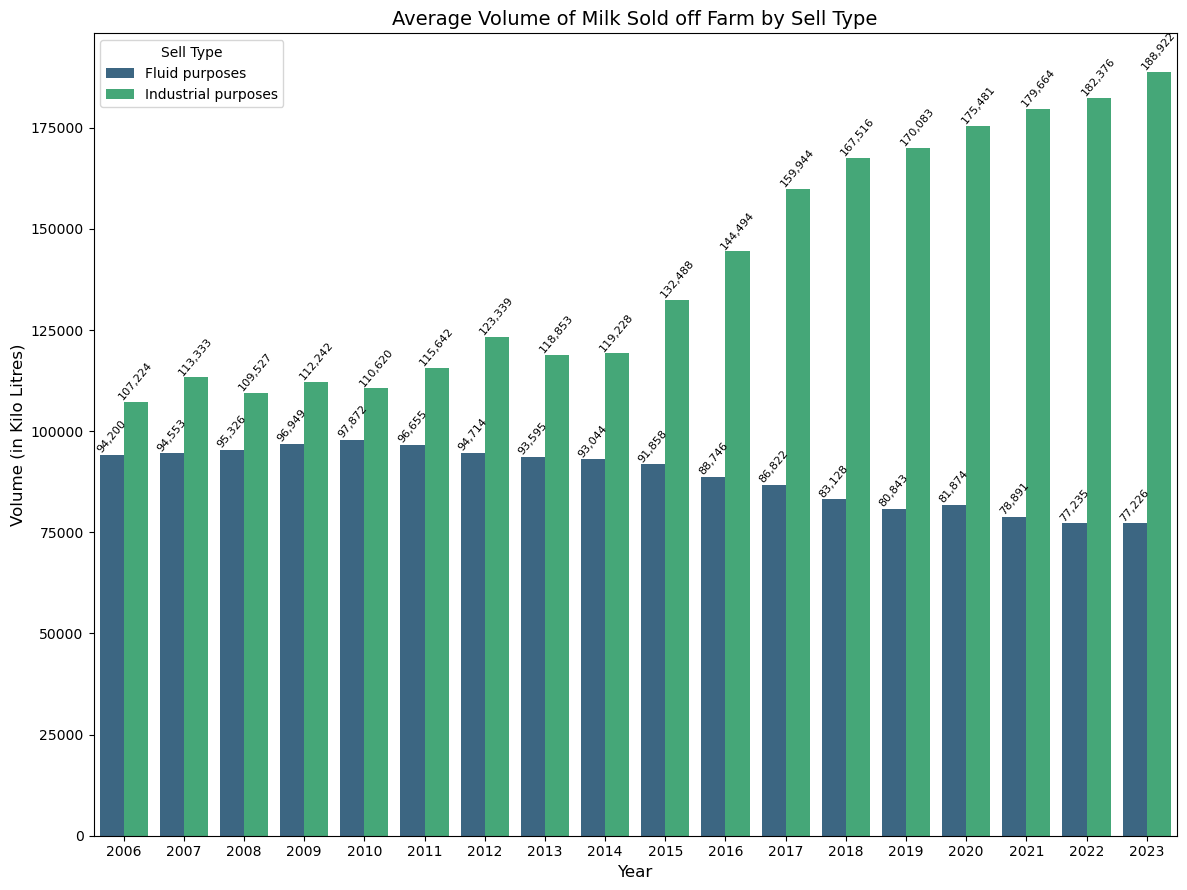

In [45]:
# The below chart will display the sales of milk for both Fluid and Industrial purpose over the years

# Plotting the bar chart
plt.figure(figsize=(12, 9))
ax = sns.barplot(x='Year', y='Volume in KL', hue='Sell Type', data=yearly_sales_type[yearly_sales_type['Location']=='Ontario'], palette='viridis')

# Adding title and labels
plt.title('Average Volume of Milk Sold off Farm by Sell Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in Kilo Litres)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation=50)

# To prevent overlapping
plt.tight_layout()

# Show the legend
plt.legend(title='Sell Type',fontsize=10)

# Show the plot
plt.show()

`From above chart we could observe that:`

- The avg. sales volume of milk for Industrial purpose has grown significantly over last 8-9 years from **119,228**(KiloLitres) in 2014 to **188,922**(KiloLitres) in 2023.
- The volume of sales for Fluid purpose came down from **93,044**(KiloLitres) to **77,226**(KiloLitres) during the same period.

`Tableau chart to show the percentage change in Sales volume for both Industrial and Fluid purpose in 2023 compared to 2006:`

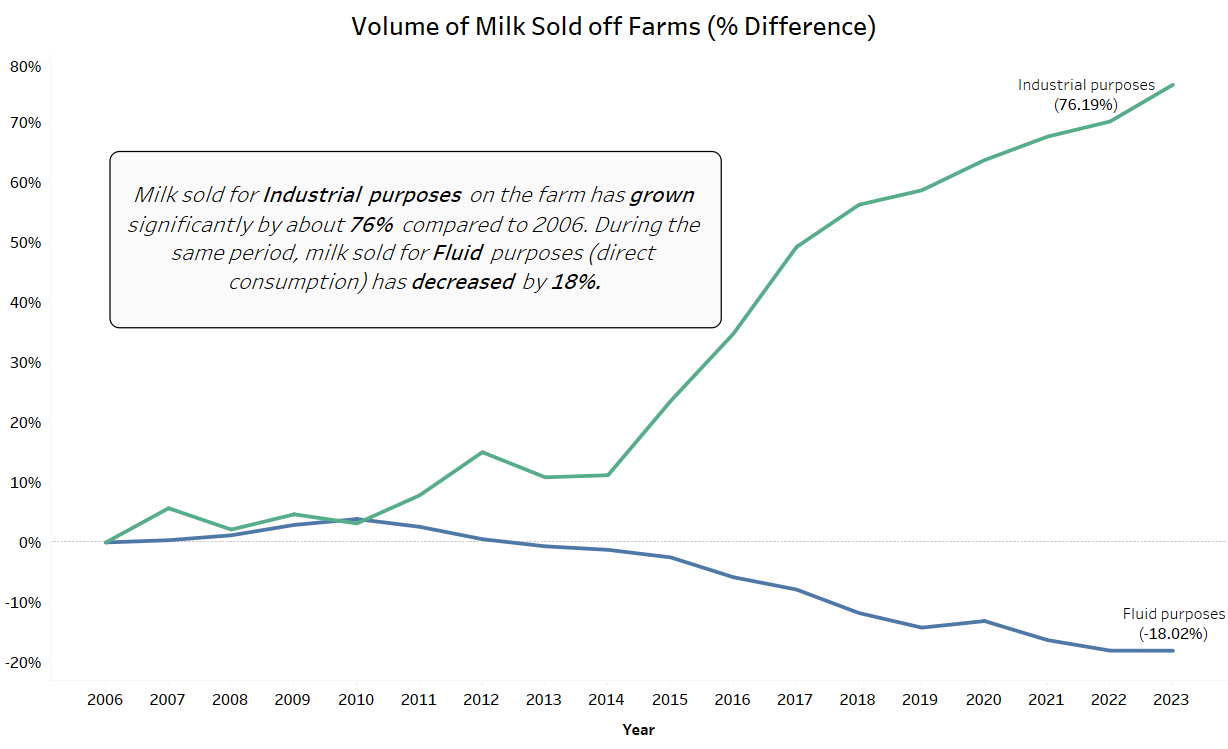

#### 2.3. Visualization to show the trend in Commercial Sales of different milk and cream product over the years.

In [24]:
df_comm.head()

,Location,Date,Type,Volume in KL
0,Canada,2006-01-01,Standard milk,34802.0
1,Canada,2006-01-01,Milk 2%,109562.0
2,Canada,2006-01-01,Skim milk,24158.0
3,Canada,2006-01-01,Buttermilk,1057.0
4,Canada,2006-01-01,Flavoured milk,16862.0


In [25]:
df_comm.tail()

,Location,Date,Type,Volume in KL
4235,Ontario,2023-08-01,Flavoured milk,4835.000000
4236,Ontario,2023-08-01,Cereal cream,3999.000000
4237,Ontario,2023-08-01,Table cream,6277.000000
4238,Ontario,2023-08-01,Whipping cream,2549.000000
4239,Ontario,2023-08-01,Sour cream,1566.446667


In [26]:
df_comm['Year'] = df_comm['Date'].dt.year.astype('int64')
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      4240 non-null   object        
 1   Date          4240 non-null   datetime64[ns]
 2   Type          4240 non-null   object        
 3   Volume in KL  4240 non-null   float64       
 4   Year          4240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 165.8+ KB


In [27]:
# Calculate the total volumne of each product type over the years
df_comm_yearly = df_comm[df_comm['Location']=='Ontario'].groupby(['Type','Year'])['Volume in KL'].mean().reset_index()
df_comm_yearly

,Type,Year,Volume in KL
0,Buttermilk,2006,511.666667
1,Buttermilk,2007,632.500000
2,Buttermilk,2008,603.000000
3,Buttermilk,2009,440.250000
4,Buttermilk,2010,326.333333
...,...,...,...
175,Whipping cream,2019,1963.750000
176,Whipping cream,2020,1983.666667
177,Whipping cream,2021,2443.000000
178,Whipping cream,2022,2684.416667


`Since our dataset have both milk and cream product together, we will first create a new column to distinguish between milk and cream and then plot them separately, to understand the distribution of both product type separately`

In [28]:
# List of Types considered as 'Milk'
milk_types = ['Standard milk', 'Milk 2%', 'Skim milk', 'Buttermilk', 'Flavoured milk', 'Milk 1%']

# Create the 'Category' column based for both Milk and Cream
df_comm_yearly['Category'] = 'Cream'
df_comm_yearly.loc[df_comm_yearly['Type'].isin(milk_types), 'Category'] = 'Milk'

# Display the updated DataFrame
df_comm_yearly


,Type,Year,Volume in KL,Category
0,Buttermilk,2006,511.666667,Milk
1,Buttermilk,2007,632.500000,Milk
2,Buttermilk,2008,603.000000,Milk
3,Buttermilk,2009,440.250000,Milk
4,Buttermilk,2010,326.333333,Milk
...,...,...,...,...
175,Whipping cream,2019,1963.750000,Cream
176,Whipping cream,2020,1983.666667,Cream
177,Whipping cream,2021,2443.000000,Cream
178,Whipping cream,2022,2684.416667,Cream


##### 2.3.1 Visualization to show the trend in Commercial Sales of different Milk products over the years.

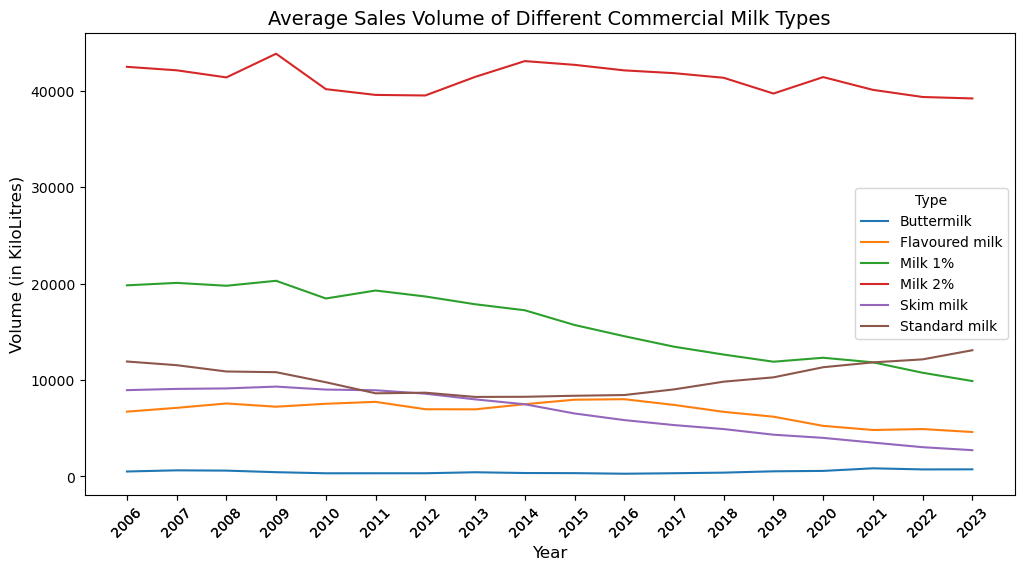

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',y='Volume in KL', data=df_comm_yearly[df_comm_yearly['Category']=='Milk'],hue='Type')

plt.title('Average Sales Volume of Different Commercial Milk Types', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in KiloLitres)', fontsize=12)
plt.xticks(yearly_sales['Year'], rotation=45,ha='center')
plt.show()

`From above chart we could observe that:`

- **Milk 2%** type have the highest volume of sales followed by **Milk 1%** type. **Butter Milk** has the lowest sale volume.
- For **Milk 2%** type, after a slight growth from 2019 to 2020, it is showing a downward trend for the past 3-4 years. 
- Similarly, for **Milk 1%** type, sales volume has been going down over the years with a minor exception in 2020.
- On the otherhand, for **Standard milk** type, we could see a rising trend over the last 6-7 years and it's sale volume have surpassed "Milk 1%" type after 2021. `

`Tableau chart to show the percentage change in Sales volume for each milk type in 2023 compared to 2006`

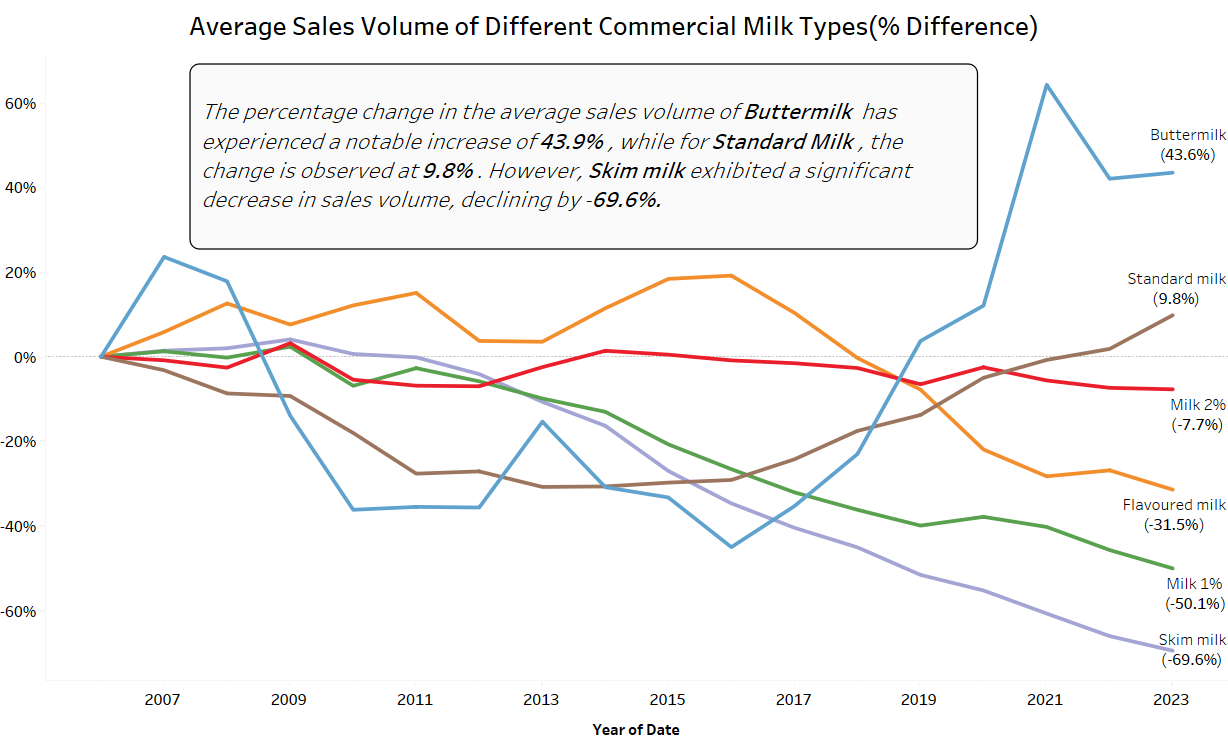

##### 2.3.2 Visualization to show the trend in Commercial Sales of different Cream products over the years.

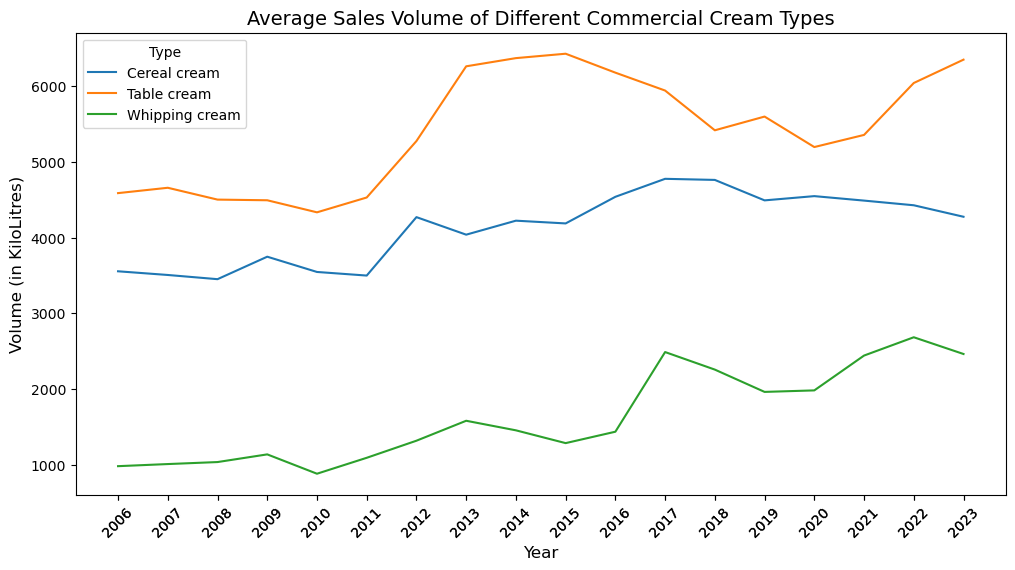

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',y='Volume in KL', data=df_comm_yearly[(df_comm_yearly['Category']=='Cream') & (df_comm_yearly['Type']!='Sour cream')],hue='Type')

plt.title('Average Sales Volume of Different Commercial Cream Types', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in KiloLitres)', fontsize=12)
plt.xticks(yearly_sales['Year'], rotation=45,ha='center')
plt.show()

`From above chart we could observe that:` 

- **Table cream** have the highest volume of sales followed by **Cereal cream**.
- **Whipping cream** have the lowest sale by volume in last few years.
- Out of all the above cream product, **Table cream** sales has shown siginificant rise in recent years.

`Tableau chart to show the percentage change in Sales volume for each cream type in 2023 compared to 2006`

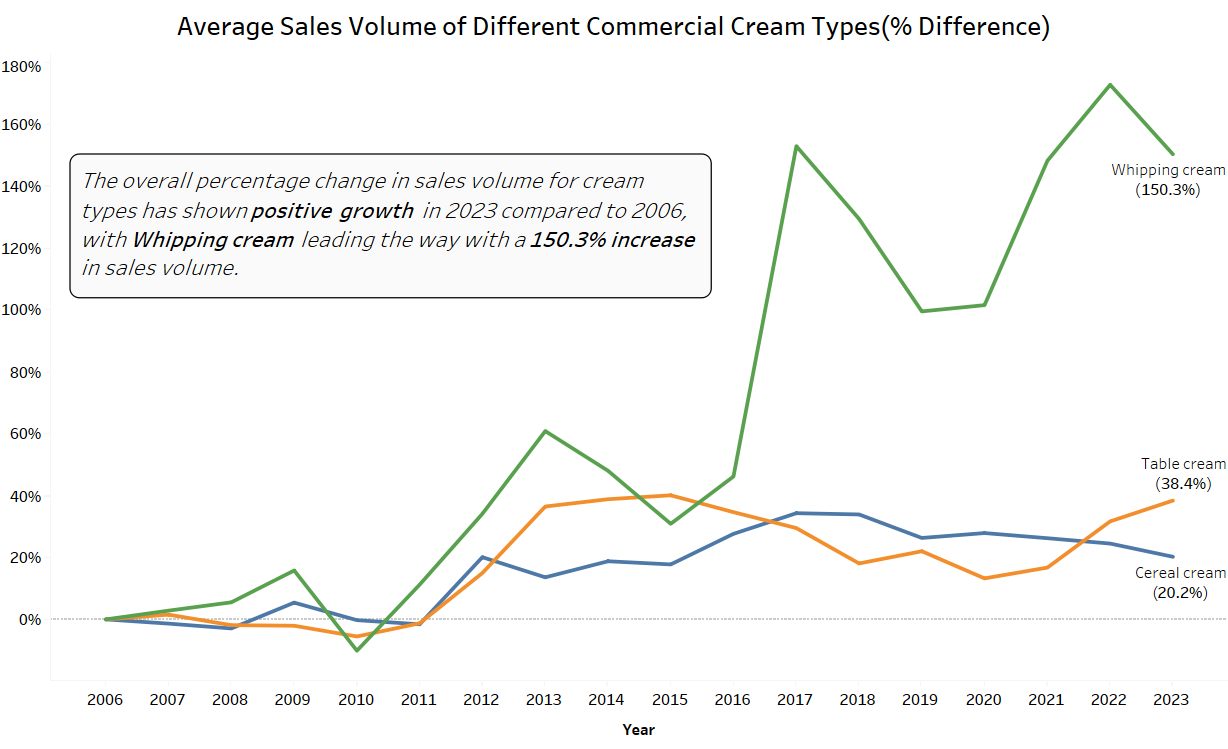

#### 2.4. Visualization to show the trend in consumption of different milk and cream product over the years (/person/year in Litres).

In [31]:
df_person

,Year,Type,Food available,Adjusted for losses
0,2006,Cereal cream,3.05,2.36
1,2007,Cereal cream,3.03,2.34
2,2008,Cereal cream,2.97,2.30
3,2009,Cereal cream,3.06,2.37
4,2010,Cereal cream,2.94,2.28
...,...,...,...,...
131,2018,Whipping cream,1.60,1.24
132,2019,Whipping cream,1.42,1.10
133,2020,Whipping cream,1.37,1.06
134,2021,Whipping cream,1.49,1.16


In [32]:
# Create the 'Category' column for both Milk and Cream
df_person['Category'] = 'Cream'
df_person.loc[df_person['Type'].isin(milk_types), 'Category'] = 'Milk'
df_person.head()

,Year,Type,Food available,Adjusted for losses,Category
0,2006,Cereal cream,3.05,2.36,Cream
1,2007,Cereal cream,3.03,2.34,Cream
2,2008,Cereal cream,2.97,2.30,Cream
3,2009,Cereal cream,3.06,2.37,Cream
4,2010,Cereal cream,2.94,2.28,Cream


##### 2.4.1 Visualization to show the trend in consumption of different Milk product over the years (/person/year in Litres)

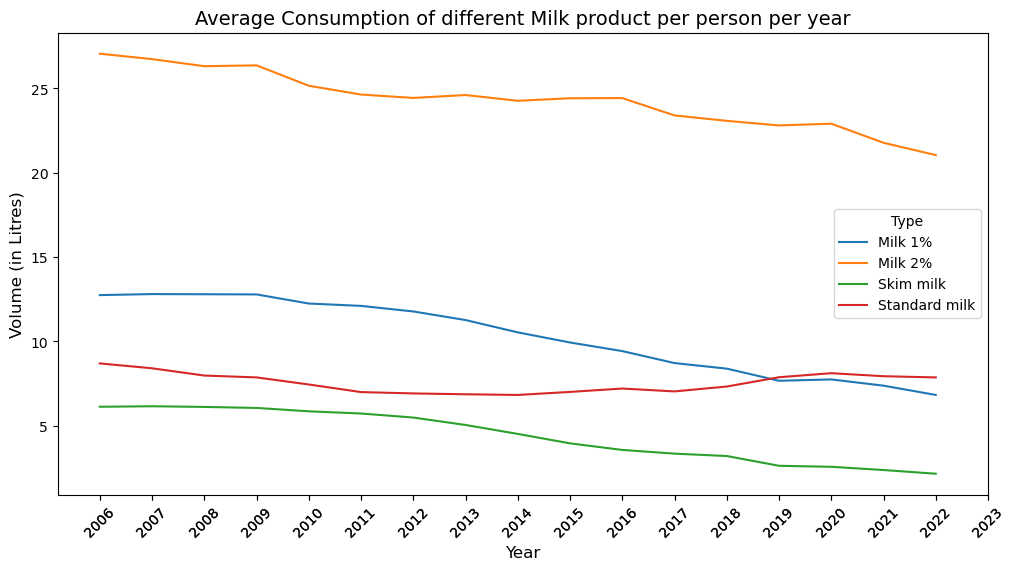

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',y='Adjusted for losses', data=df_person[df_person['Category']=='Milk'],hue='Type')

plt.title('Average Consumption of different Milk product per person per year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in Litres)', fontsize=12)
plt.xticks(yearly_sales['Year'], rotation=45,ha='center')
plt.show()

`From above chart we could observe that:`

- **Milk 2%** is the **highest-consumed** product per person, while **Skim milk** is the **lowest**.
- Over the years, per person consumption volumes have generally exhibited a **declining trend** for most products, with the notable **exception** of **Standard Milk**.
- A **positive** observation is that the consumption of **Standard Milk** has demonstrated a **growing trend** in recent years.

`Tableau chart to show the percentage change in Per Person consumption of differnt milk types in 2023 compared to 2006`

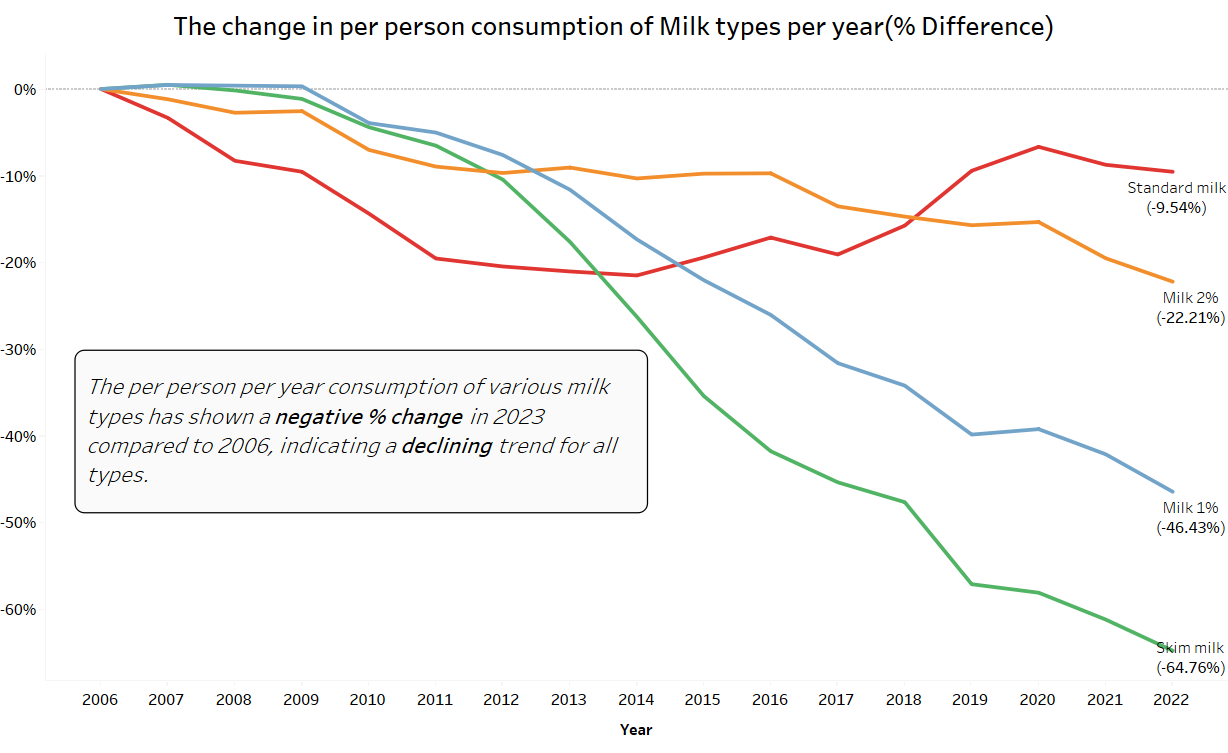

##### 2.4.2 Visualization to show the trend in consumption of different Cream product over the years (/person/year in Litres)

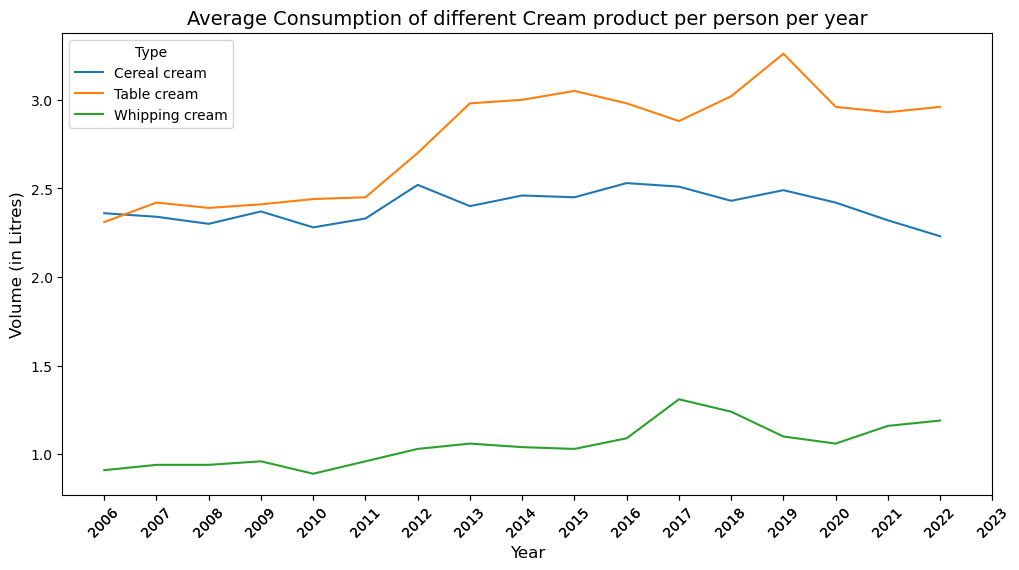

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',y='Adjusted for losses', data=df_person[(df_person['Category']=='Cream') & (df_person['Type']!='Sour cream')],hue='Type')

plt.title('Average Consumption of different Cream product per person per year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (in Litres)', fontsize=12)
plt.xticks(yearly_sales['Year'], rotation=45,ha='center')
plt.show()

`From above chart we could observe that:`

- **Table cream** is the **highest-consumed** cream product per person, while **Whipping cream** is the **lowest**.
- Over the years, per person consumption volumes have generally exhibited an **increasing** trend for most products except **Cereal Cream**.

`Tableau chart to show the percentage change in Per Person consumption of differnt cream types in 2023 compared to 2006`

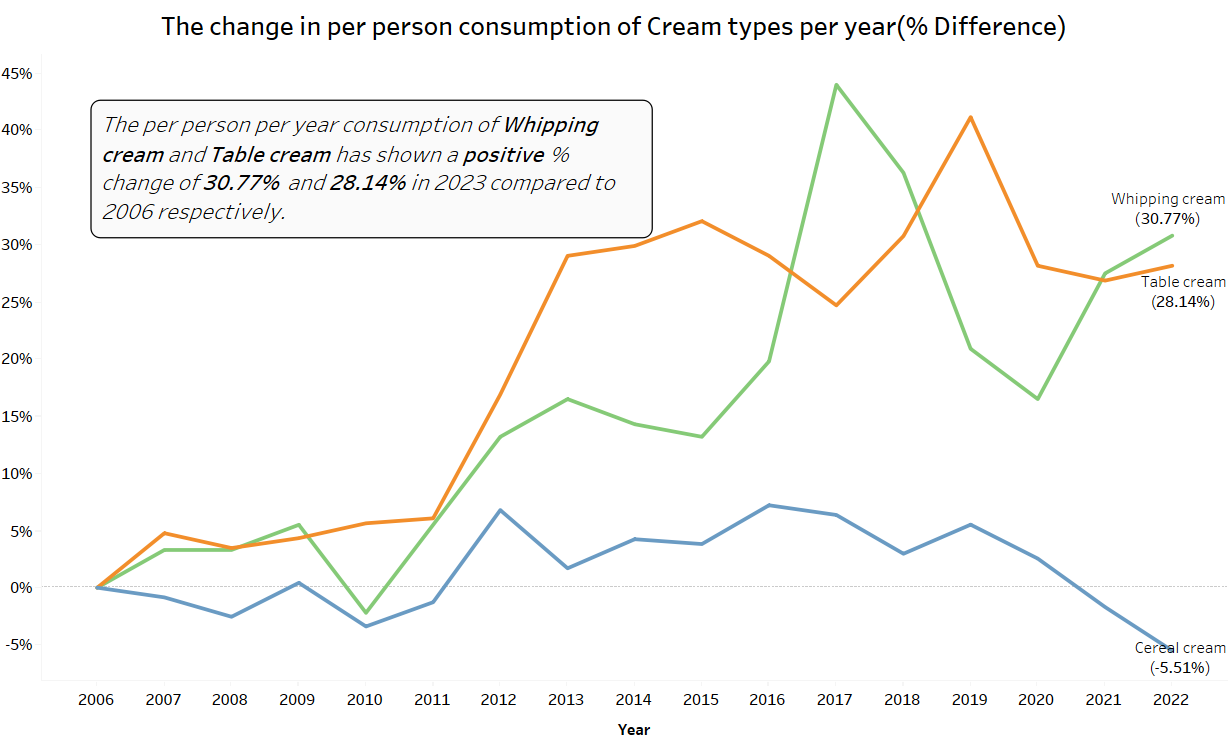

#### 2.5. Visualization to show the overall sales amount in Dollars(in Thousands) from the dairy farm over the years.

In [35]:
df_cash.head()

,Location,Date,Transactions type,Amount in K
0,Canada,2006-01-01,Total cash receipts,419008
1,Canada,2006-01-01,Total deductions,28844
2,Canada,2006-01-01,Transport handling fees,15810
3,Canada,2006-01-01,Administration fees,2608
4,Canada,2006-01-01,Promotion and advertising,7508


In [36]:
# create a year column from the existing date column.
df_cash['Year'] = df_cash['Date'].dt.year.astype('int64')
df_cash.head()

,Location,Date,Transactions type,Amount in K,Year
0,Canada,2006-01-01,Total cash receipts,419008,2006
1,Canada,2006-01-01,Total deductions,28844,2006
2,Canada,2006-01-01,Transport handling fees,15810,2006
3,Canada,2006-01-01,Administration fees,2608,2006
4,Canada,2006-01-01,Promotion and advertising,7508,2006


In [37]:
# Calculate the total amount in Dollar for each year for each transaction type.
df_cash_yearly = df_cash[df_cash['Location']=='Ontario'].groupby(['Transactions type','Year'])['Amount in K'].mean().reset_index()
df_cash_yearly

,Transactions type,Year,Amount in K
0,Administration fees,2006,938.000000
1,Administration fees,2007,975.416667
2,Administration fees,2008,881.750000
3,Administration fees,2009,1030.416667
4,Administration fees,2010,1117.666667
...,...,...,...
121,Transport handling fees,2019,7022.500000
122,Transport handling fees,2020,7099.000000
123,Transport handling fees,2021,7325.250000
124,Transport handling fees,2022,8677.083333


##### 2.5.1. Visualization of the Total Cash receipts from the dairy farm over the years.

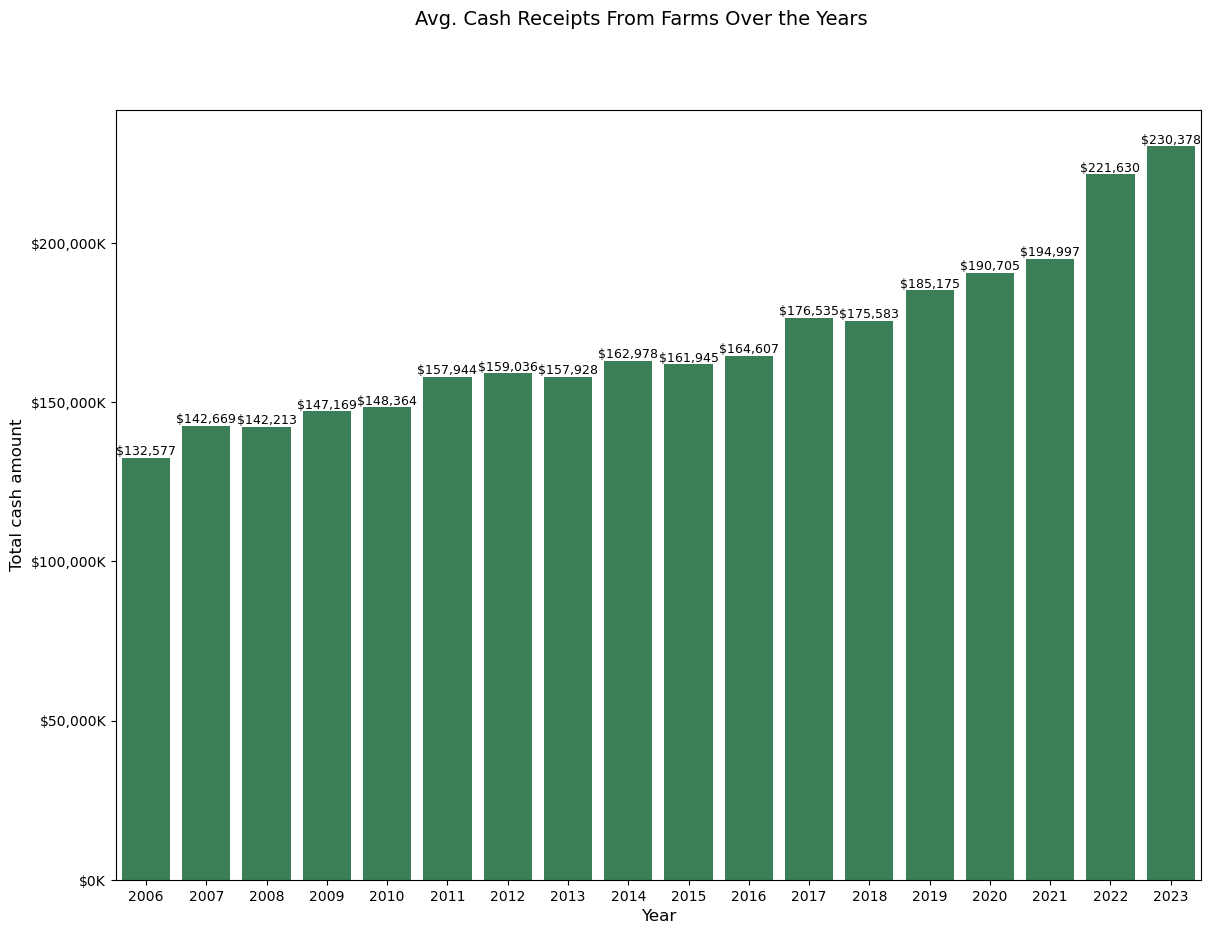

In [38]:
plt.figure(figsize=(14,10))

# Creating separate plots for "Gross total" and "Total deductions"
sns.barplot(x='Year', y='Amount in K', data=df_cash_yearly[df_cash_yearly['Transactions type']=='Total cash receipts'], color='seagreen')

# Adding title and labels
plt.suptitle('Avg. Cash Receipts From Farms Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total cash amount', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

def format_dollars(value, _):
    return f"${value:,.0f}K"

# Applying the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Code to display value on top of each bar.
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f"${p.get_height():,.0f}",
             ha='center', va='bottom', rotation=0, fontsize=9)

# Show the plot
plt.show()

`From above chart we could observe that:`

- the cash receipts from Milk Sales has shown a gradual increase over the years till 2021
- From 2021 to 2022, it has shown a significant increase from $194,997 to $221,630.`


`Tableau chart to show the combine trend in Avg. Cash receipts and percentage change in Cash receipts of Milk Sales compared to previous year: `

![Cash receipt-2.png](<attachment:Cash receipt-2.png>)
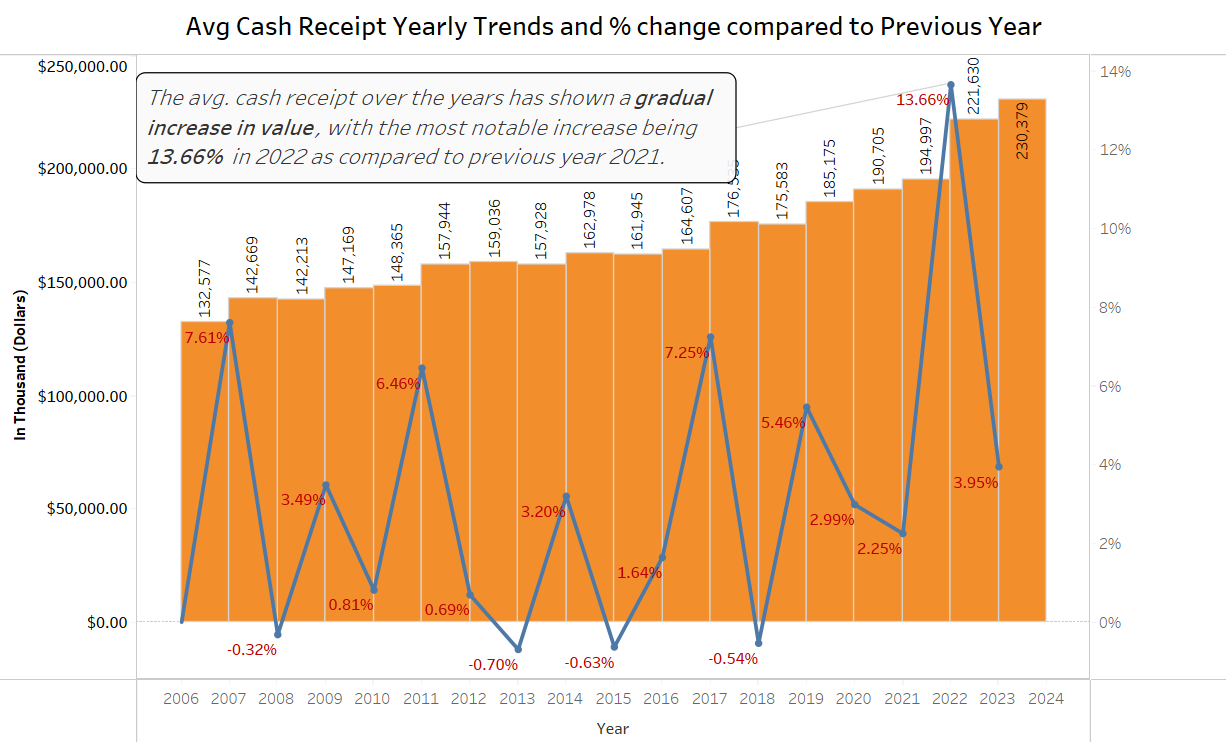

##### 2.5.2. Visualization of the total amounts related to various fees in the dairy farm over the years.

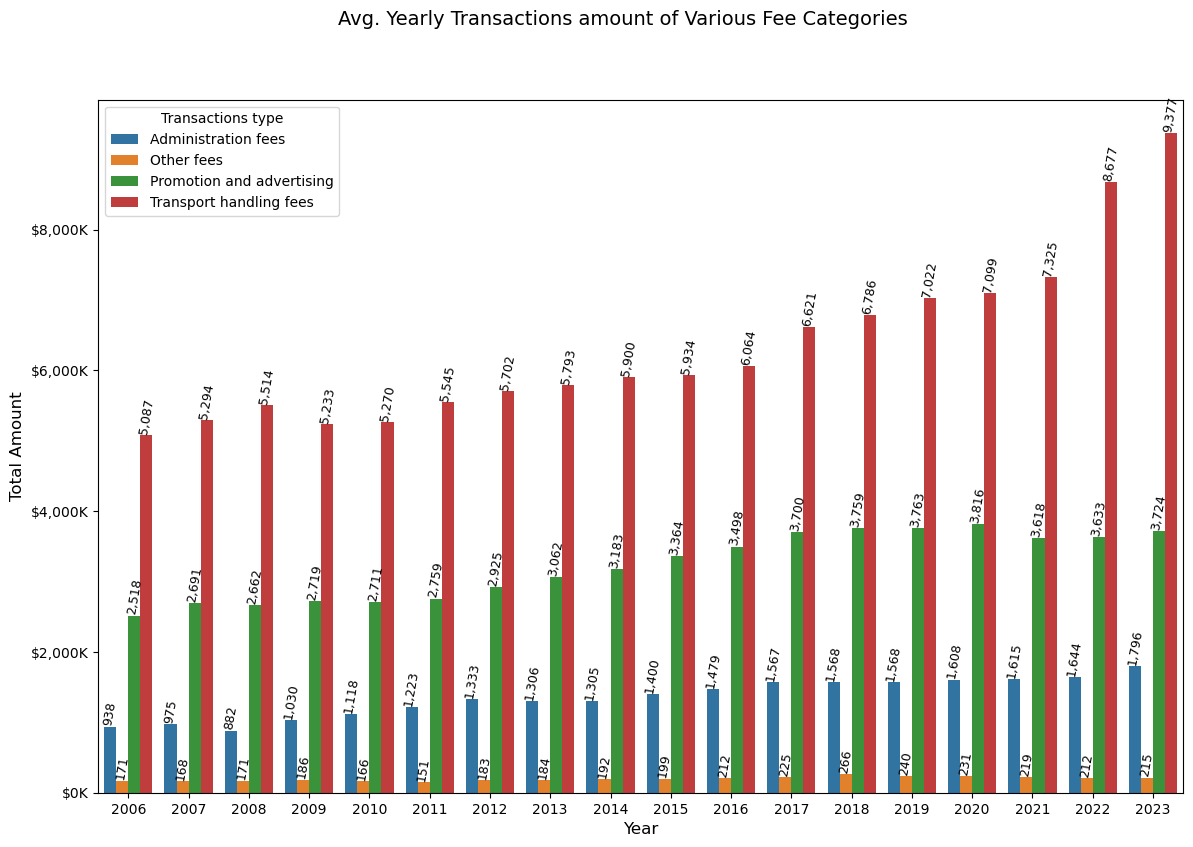

In [39]:
plt.figure(figsize=(14, 9))

# Creating bar charts for different type of transactions which ccontribute to the overall total.
sns.barplot(x='Year', y='Amount in K', data=df_cash_yearly[(df_cash_yearly['Transactions type']!='Total cash receipts') & (df_cash_yearly['Transactions type']!='Total deductions') & (df_cash_yearly['Transactions type']!='Gross total')], hue ='Transactions type' )

# Adding title and labels
plt.suptitle('Avg. Yearly Transactions amount of Various Fee Categories', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

def format_dollars(value, _):
    return f"${value:,.0f}K"

# Applying the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Displaying values on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():,.0f}",
             ha='center', va='bottom', rotation=80, fontsize=9)

# Show the plot
plt.show()


`From above chart we could observe that:`

- The major portion of additional fees is related to **Transport Handling Fees** followed by **Promotion and advertising** fees.
- In the last 2 years, the Average Fees related to **Transportation** have increased by a significant amount from *$7325k* in 2021 to *$9377K* in 2023.

`Tableau chart to show the percentage change in Average Fee amount for various Fee categories in 2023 compared to 2006: `

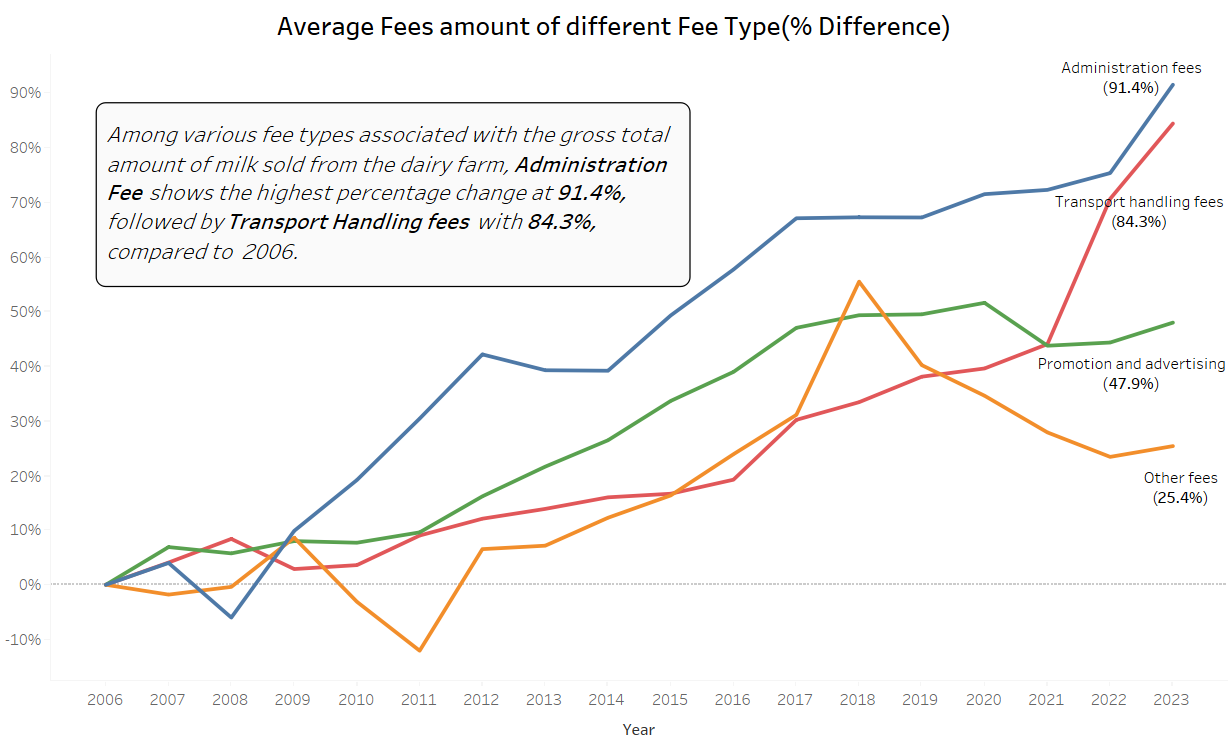

#### 3. Forecast the Total Sales Volume of Milk Sold off Farm for both Fluid and Industrial Purpose for upcoming years

`I have used Tableau's Exponential Smoothing method to predict the Total Sales volume of milk for the next 3 years (2023, 2024 & 2025)`.
`Due to less number of records in our dataset, I have used Exponential Smoothing method instead of Machine Learning model to do the Sales prediction, as Tableau's prediction model works better on smaller dataset as well.`

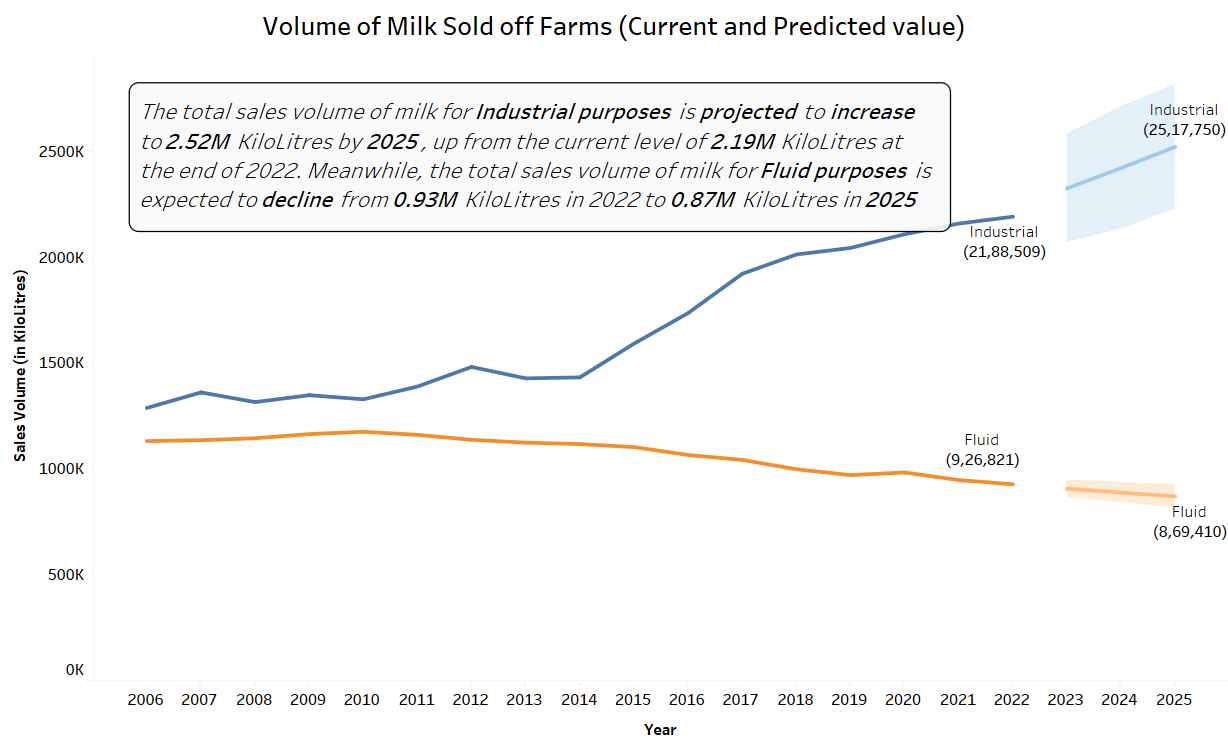